<a href="https://colab.research.google.com/github/emmendezp/MetNumUN2021II/blob/main/Lab%2017/Grupo20AlgorithmicToolboxWeek6NumericalCalculusDerivativesIntegrals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part I. One-sided finite differences

Write a function, `deriv`, which computes a derivative of its argument at a given point, $x$, using a one-sided finite difference rule with a given step side $h$, with the approximation order of $O(h^2)$. 

In [1]:
import numpy as np

In [2]:
def deriv(f, x, h):
    """ Compute a derivative of `f` at point `x` with step size `h`.
    
    Compute the derivative using the one-sided rule of the approximation order of $O(h^2)$.
    
    Parameters
    ----------
    f : callable
        The function to differentiate
    x : float
        The point to compute the derivative at.
    h : float
        The step size for the finite different rule.
        
    Returns
    -------
    fder : derivative of f(x) at point x using the step size h.
    """
    f_d = lambda q: (f(x+q*h)-f(x))/(q*h)
    
    return 2*f_d(0.5) - f_d(1)

#### Test I.1

Test your function on a simple test case: differentiate $f(x) = x^3$ at $x=0$. Comment on whether your results are consistent with the expected value of $f'(x) = 0$ and on an expected scaling with $h\to 0$.

 (10% of the total grade)

In [3]:
x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(lambda x: x**3, x, h)
    print("%5f -- %7.4g" % (h, err))

0.010000 --  -5e-05
0.001000 --  -5e-07
0.000100 --  -5e-09
0.000010 --  -5e-11


Clearly seen that while decreasing only by 1 degree, error decreasing by 2. That means that our error is $O(h^2)$

### Test I.2

Now use a slightly more complicated function, $f(x) = x^2 \log{x}$, evaluate the derivative at $x=1$ using your one-sided rule and a two-point one-sided rule. Roughly estimate the value of $h$ where the error stops decreasing, for these two schemes. 
(15% of the total grade)

In [4]:
import matplotlib.pyplot as plt

In [5]:
def two_points_scheme(f, x, h):
    return (f(x+h)-f(x))/h

In [6]:
from math import log

def f(x):
    return x**2 * log(x)
    
def fder(x):
    return x * (2.*log(x) + 1)

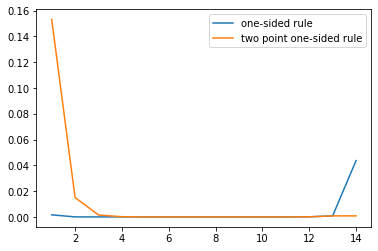

In [7]:
eps = []
err1 = [abs(fder(1) - deriv(f, 1, pow(10, -i))) for i in range(1, 15)] 
err2 = [abs(fder(1) - two_points_scheme(f, 1, pow(10, -i))) for i in range(1, 15)] 

plt.plot(list(range(1, 15)), err1)
plt.plot(list(range(1, 15)), err2)
plt.legend(labels = ["one-sided rule", "two point one-sided rule"])

error stops decresing at $10^{-13}$ for both schemes

### Test I.3 

Now try differentiating $x^2 \log(x)$ at $x=0$. Use the three-point one-sided rule. Note that to evaluate the function at zero, you need to special-case this value. Check the scaling of the error with $h$, explain your results. 
(25% of the total grade)

In [8]:
def three_points_scheme(f ,x ,h):
    return (-3/2*f(x) + 2*f(x + h) -1/2*f(x+2*h))/h

In [9]:
def f(x):
    if x == 0:
        # the limit of $x^2 log(x)$ at $x-> 0$ is zero, even though log(x) is undefined at x=0
        return 0.0
    else:
        return x**2 * log(x)
    
def fder(x):
    if x == 0:
        return 0.0
    else:
        return x*(2*log(x) + 1)

x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(f, x, h) - fder(x)
    print("%5f -- %7.4g" % (h, err))

0.010000 -- -0.006931
0.001000 -- -0.0006931
0.000100 -- -6.931e-05
0.000010 -- -6.931e-06


In the case of $\lim_{x\to\infty} f'''(x) = \lim_{x\to\infty} \frac{1}{x} = \infty$, error, which is given by $err = C\cdot f'''(x)\cdot h^2$ - has other convergency speed

# Part II. Midpoint rule 

Write a function which computes a definite integral using the midpoint rule up to a given error, $\epsilon$. Estimate the error by comparing the estimates of the integral at $N$ and $2N$ elementary intervals. 

In [10]:
def midpoint_rule(func, a, b, eps):
    """ Calculate the integral of f from a to b using the midpoint rule.
    
    Parameters
    ----------
    func : callable
        The function to integrate.
    a : float
        The lower limit of integration.
    b : float
        The upper limit of integration.
    eps : float
        The target accuracy of the estimate.
        
    Returns
    -------
    integral : float
        The estimate of $\int_a^b f(x) dx$.
    """
    N = 5
    err = eps+1
    prev_iter = 1e30
    
    while err > eps and N<1e5:
        h = (b - a)/N
        intg = 0
        for i in range(1, N+1):
            intg += func(h*i-h/2.0)*h
        err = abs(prev_iter - intg)
        prev_iter = intg
        N*=2
        
    return prev_iter, N/2

### Test II.1

Test your midpoint rule on a simple integral, which you can calculate by paper and pencil.

Compare the rate of convergence to the expected $O(N^{-2})$ scaling by studying the number of intervals required for a given accuracy $\epsilon$.

Compare the numerical results to the value you calculated by hand. Does the deviation agree with your estimate of the numerical error?
(20% of the total grade)


In [11]:
for h in [1e-2, 1e-3, 1e-4, 1e-10]:
    err = midpoint_rule(lambda x: x**3, 0, 1, h)
    print(err[1])
    print("%5f -- %7.4g" % (h, err[0]-0.25))

10.0
0.010000 -- -0.00125
20.0
0.001000 -- -0.0003125
80.0
0.000100 -- -1.953e-05
81920.0
0.000000 -- -1.863e-11


### Test II.2

Now use your midpoint rule to compute the value of

$$
\int_0^1\! \frac{\sin{\sqrt{x}}}{x}\, dx
$$

up to a predefined accuracy of $\epsilon=10^{-4}$.

Note that the integral contains an integrable singularity at the lower limit. Do calculations two ways: first, do a straightforward computation; next, subtract the singularity. Compare the number of iterations required to achieve the accuracy of $\epsilon$.

(30% of the total grade)

In [12]:
func = lambda x: np.sin(np.sqrt(x))/x
modified_func = lambda x: (np.sqrt(x)*np.sin(np.sqrt(x))-x)/(x*np.sqrt(x))

true_integral = 1.8921661407343660298827066

for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = midpoint_rule(func, 0, 1, h)
    print(err[1])
    print("%5f -- %7.4g" % (h, err[0]-true_integral))
    
    err = midpoint_rule(modified_func, 0, 1, h)
    print(err[1])
    print("%5f -- %7.4g" % (h, err[0]+2 - true_integral))
    
    
    print("---------------")

640.0
0.010000 -- -0.02391
10.0
0.010000 -- -0.0002908
---------------
81920.0
0.001000 -- -0.002113
10.0
0.001000 -- -0.0002908
---------------
81920.0
0.000100 -- -0.002113
40.0
0.000100 -- -3.824e-05
---------------
81920.0
0.000010 -- -0.002113
160.0
0.000010 -- -4.898e-06
---------------


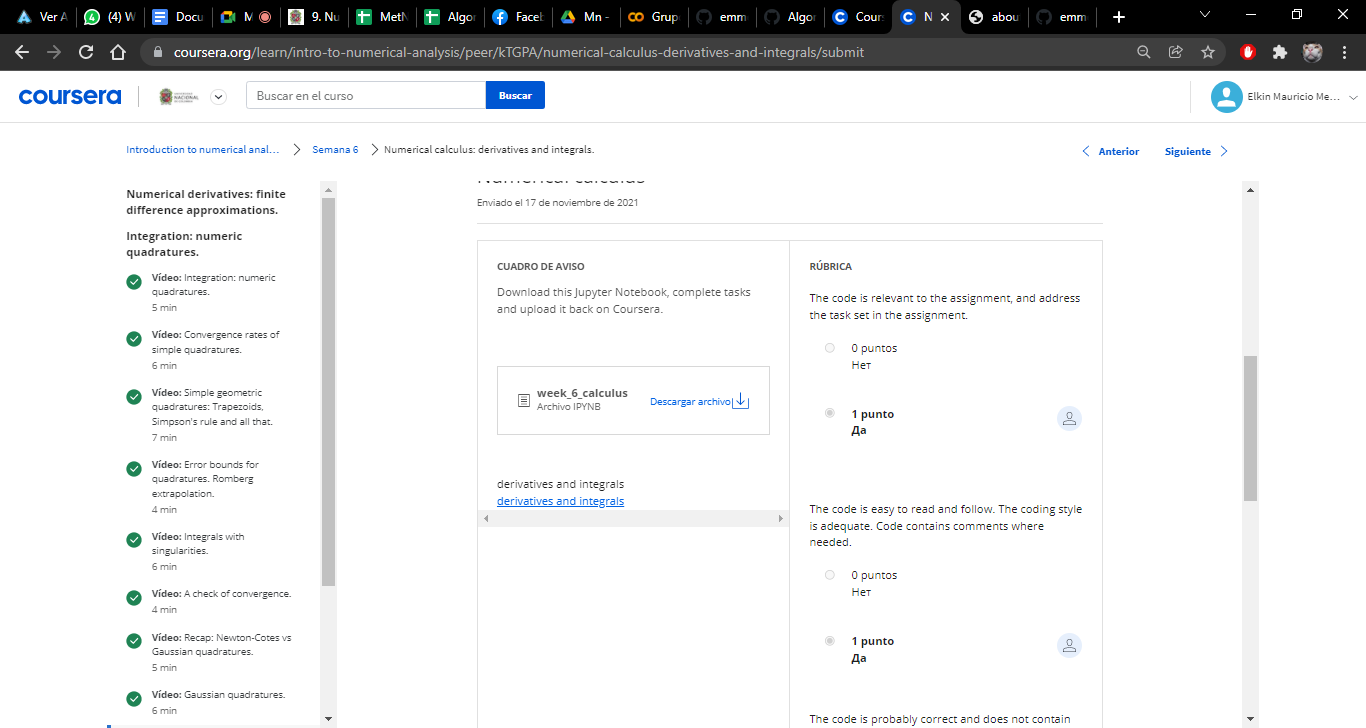

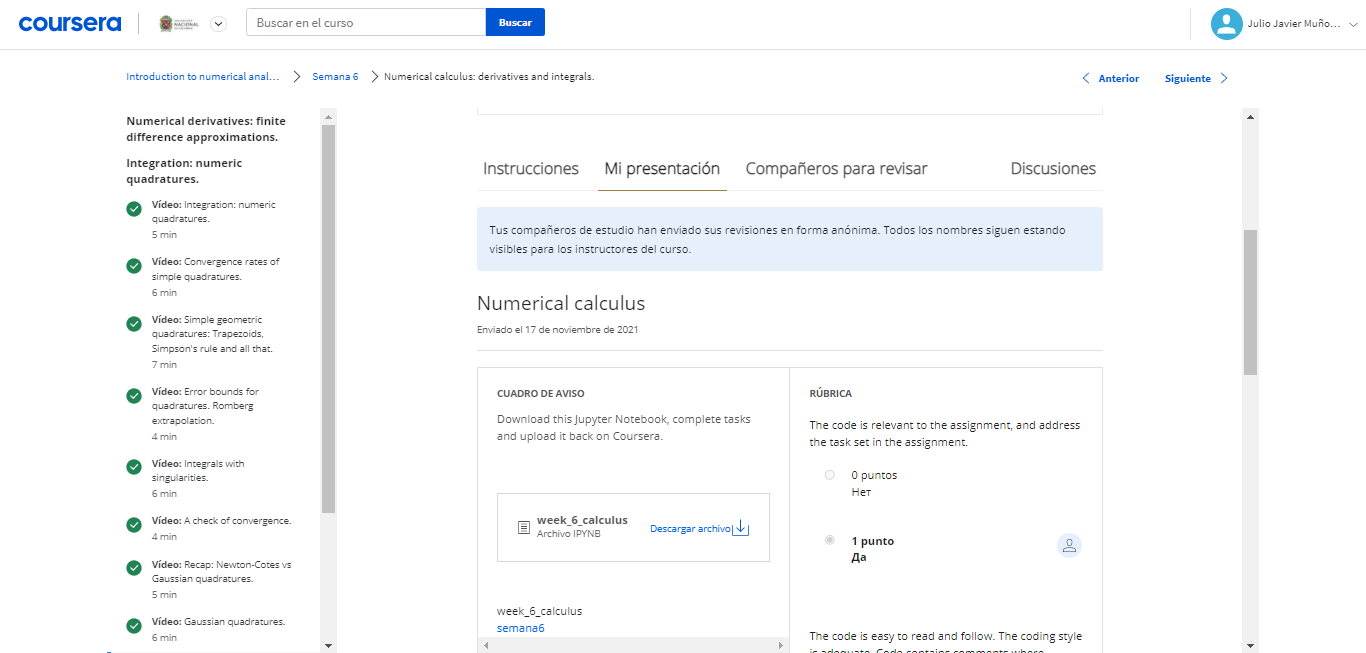

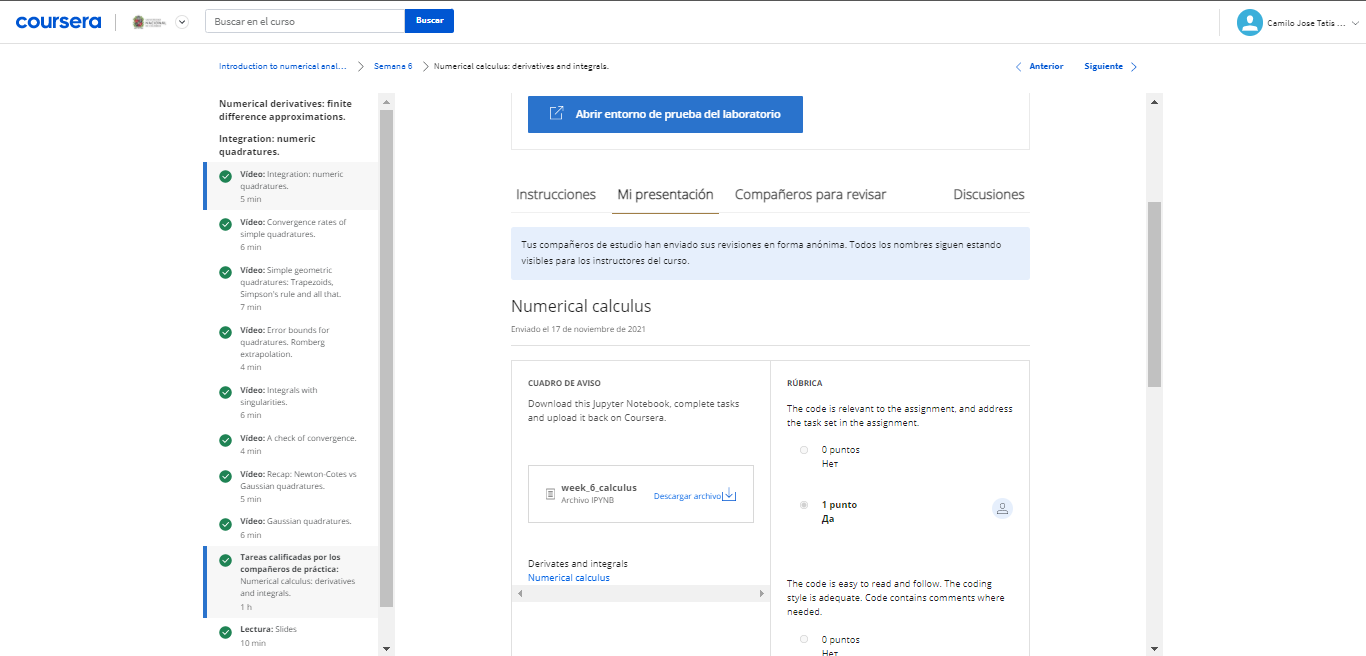